# Introduction to BIG DATA Project
- Ahmed ABDULHALIM
- Koussaïla BEN MAMAR
- Ibrahim EL KARRAT

Data analysis project about:
- Electricity consumption for each department
- Average rent per department (merged with energy consumption)
- House/Apartments sale/rent ads from XML RSS streams
- Energy consumption evolution from 2011 to 2016 with plots

# Python libraries for configuration:
Pandas (Data analysis)
Numpy (Plots)
Matplotlib

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd

# Initialization of Data Frames
- Main data frame: 162,3 MB CSV file, available on ENEDIS website:  https://data.enedis.fr/explore/dataset/consommation-electrique-par-secteur-dactivite-commune/
- Second data frame about average price per square meter of an apartment/house + average rent price per square meter

In [ ]:
df = pd.read_csv("consommation-electrique-par-secteur-dactivite-commune.csv" ,";")
df2 = df
Price_df = pd.read_csv("Data.csv" ,",",encoding="latin1")

df["Conso moyenne Industrie (MWh)"] = df["Conso totale Industrie (MWh)"] / df["Nb sites Industrie"]

df["Nb sites others"] = df["Nb sites Agriculture"] + df["Nb sites Tertiaire"] + df["Nb sites Secteur non affecté"]
df["Conso totale others (MWh)"] = df["Conso totale Agriculture (MWh)"] + df["Conso totale Tertiaire (MWh)"] + df["Conso totale Secteur non affecté (MWh)"]
df["Conso moyenne others (MWh)"] = df["Conso totale others (MWh)"] / df["Nb sites others"]

df["Nb sites total"] = df["Nb sites Résidentiel"] + df["Nb sites Professionnel"] + df["Nb sites Industrie"] + df["Nb sites others"]
df["Conso totale total (MWh)"] = df["Conso totale Résidentiel (MWh)"] + df["Conso totale Professionnel (MWh)"] + df["Conso totale Industrie (MWh)"] + df["Conso totale others (MWh)"]
df["Conso moyenne total (MWh)"] = df["Conso totale total (MWh)"] / df["Nb sites total"]

df["Nb sites  non-Résidentiel"] = df["Nb sites Professionnel"] + df["Nb sites Industrie"] + df["Nb sites others"]
df["Conso totale non-Résidentiel (MWh)"] =  df["Conso totale Professionnel (MWh)"] + df["Conso totale Industrie (MWh)"] + df["Conso totale others (MWh)"]
df["Conso moyenne non-Résidentiel (MWh)"] = df["Conso totale non-Résidentiel (MWh)"] / df["Nb sites  non-Résidentiel"]

df[["Code commune","Année","Code département","Code région","Nombre d'habitants","Taux de chauffage électrique","Nb sites Résidentiel","Conso totale Résidentiel (MWh)","Conso moyenne Résidentiel (MWh)","Nb sites Professionnel","Conso totale Professionnel (MWh)","Conso moyenne Professionnel (MWh)","Nb sites Industrie","Conso totale Industrie (MWh)","Conso moyenne Industrie (MWh)","Nb sites others","Conso totale others (MWh)","Conso moyenne others (MWh)","Nb sites total","Conso totale total (MWh)","Conso moyenne total (MWh)" ,"Nb sites  non-Résidentiel" , "Conso totale non-Résidentiel (MWh)" , "Conso moyenne non-Résidentiel (MWh)"]]

# Data Frame filtering for 2016
With:
- Department code
- Mean of Electric heating rate (Taux de chauffage électrique)
- Total of residents (in the department)
- Mean of residential consumption (in MWh)
- Mean of non-residential consumption (in MWh, offices + industries + others)

In [2]:
#===============Filtring
F_Data = df[df["Année"] == 2016]
F_Data = F_Data [[ "Code département","Taux de chauffage électrique","Conso moyenne Résidentiel (MWh)","Conso moyenne non-Résidentiel (MWh)","Nombre d'habitants"]  ]
F_Data = F_Data.rename(index=str, columns={"Code département":"Département"})
F_Data = F_Data.groupby("Département",as_index=False).agg({"Nombre d'habitants":sum , "Taux de chauffage électrique":"mean" , "Conso moyenne Résidentiel (MWh)":sum , "Conso moyenne non-Résidentiel (MWh)":sum })

F_Data[:1]

,Département,Nombre d'habitants,Taux de chauffage électrique,Conso moyenne Résidentiel (MWh),Conso moyenne non-Résidentiel (MWh)
0,1,595972,24.008941,2429.089964,14098.010886


# Data frame merge
This data frame is merged from:
- Consumption data frame per department
- Average prices of houses/apartments prices for sale or rent per square meter

In [4]:
#===============Merging Tables
G_Data_Unsorted = pd.merge(F_Data,Price_df,on="Département")
G_Data_Unsorted[:1]

,Département,Nombre d'habitants,Taux de chauffage électrique,Conso moyenne Résidentiel (MWh),Conso moyenne non-Résidentiel (MWh),Prix m2 moyen appartement,Prix m2 moyen maison,Loyer m2 moyen appartement
0,1,595972,24.008941,2429.089964,14098.010886,2 138 ,1 981 ,"8,8 "


# Plot display betw

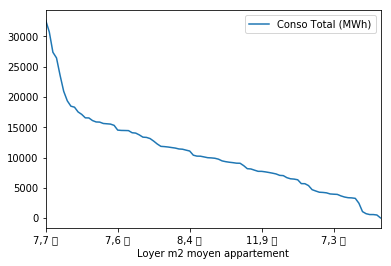

In [5]:
#===============Data Manipulation
#= = = = = Total Consumption with ranting
G_Data_Unsorted["Conso Total (MWh)"] = G_Data_Unsorted["Conso moyenne non-Résidentiel (MWh)"] + G_Data_Unsorted["Conso moyenne Résidentiel (MWh)"]
G_Data = G_Data_Unsorted[["Département","Nombre d'habitants","Taux de chauffage électrique","Conso Total (MWh)","Loyer m2 moyen appartement","Prix m2 moyen appartement","Prix m2 moyen maison"]]
G_Data = G_Data.sort_values("Conso Total (MWh)", ascending=False).reset_index()
G_Data = G_Data.drop("index",1)
G_Data.plot(x="Loyer m2 moyen appartement", y="Conso Total (MWh)")

# Average consumption plots
2 plots, 2 axis (x = consumption, y = department code):
- Non residential consumption (orange curve): offices + industries + others
- Residential consumption (blue curve)

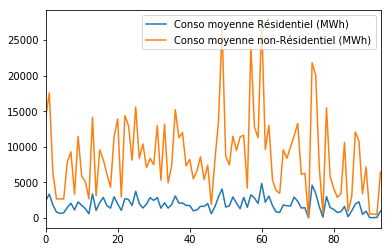

In [6]:
#= = = = = Total Consumption with ranting
C_Data = F_Data[["Conso moyenne Résidentiel (MWh)","Conso moyenne non-Résidentiel (MWh)"]]
C_Data.plot()

# RSS XML Stream
- 3 links of XML RSS Streams
- Related to ads for sale or rent
- Description + link + title

In [7]:
import requests
from xml.dom.minidom import parseString
import xml.dom.minidom
import json

XML_URL_01  = 'https://www.trouver-un-logement-neuf.com/rss/immobilier-neuf-alsace.html'
XML_URL_02  = 'http://www.chauvinimmobilier.com/catalog/rss.php?search_id=88442770'
XML_URL_03  = 'https://www.ouestfrance-immo.com/flux-rss/rennes-35-35238/'
data = {}  

def RSS_To_DataFrame(xml , changes=False):
    # Open XML document using minidom parser
    XML_DATA = requests.get(xml).content
    DOMTree = parseString(XML_DATA)#.decode('utf-8'))
    collection = DOMTree.documentElement

    if collection.hasAttribute("channel"):
        print ("Root element : %s" % collection.getAttribute("channel"))

    Items = collection.getElementsByTagName("item")
    data['items'] = []  
    for item in Items:
        title = item.getElementsByTagName('title')[0]
        #print ("Title: " , title.childNodes[0].data)
        link = item.getElementsByTagName('link')[0]
        description = item.getElementsByTagName('description')[0]
        #print ("description: " , description.childNodes[0].data.split(">")[1] , "\n")
        descriptions = description.childNodes[0].data.split(">")[0]
        if (changes) :
            descriptions = description.childNodes[0].data.split(">")[1]
        data['items'].append({  
        'title': title.childNodes[0].data,
        'link' : link.childNodes[0].data,
        'description': descriptions,
        
        })
    return pd.DataFrame(data['items'])

DF_83 = RSS_To_DataFrame(XML_URL_01,True)[:2]#83Dep
DF_73 = RSS_To_DataFrame(XML_URL_02)[:2]     #73Dep
DF_33 = RSS_To_DataFrame(XML_URL_03)[1:3]    #33Dep
                
Data_Fs = DF_83 
Data_Fs = Data_Fs.append(DF_73)
Data_Fs = Data_Fs.append(DF_33)
Data_Fs

,description,link,title
0,"20 appartements neufs du 3 au 5 pièces, lumine...",https://www.trouver-un-logement-neuf.com/immob...,Bas-Rhin 67 - Achenheim - La Cle des Champs 2
1,La résidence REINER est située en plein cur d...,https://www.trouver-un-logement-neuf.com/immob...,Bas-Rhin 67 - Achenheim - Reiner
0,Bel appartement composé de deux chambres. une ...,http://www.chauvinimmobilier.com/fiches/_13475...,Bel Appartement T3 Saint Avre - Loyer 530 Euro...
1,T2 entièrement rénové dans petite copropriété ...,http://www.chauvinimmobilier.com/fiches/_13476...,T2 Entièrement Rénové ORELLE - Loyer 350 Euro/...
1,"RENNES, T2 - RENNES - LA MABILAIS - Rue du Sap...",https://www.ouestfrance-immo.com/immobilier/ve...,Vente appartement Rennes - 182 000€
2,"RENNES, T2 - RENNES - LA MABILAIS - Rue du Sap...",https://www.ouestfrance-immo.com/immobilier/ve...,Vente appartement Rennes - 468 000€


# Custom data frame for consumption evolution
- Fundamental informations useful for our data analysis.
- New data frame
- Custom columns (sum of consumption)

In [13]:
# Custom data frame
data_frame_energy = pd.DataFrame()
# Création de nouvelles colonnes
data_frame_energy['Année'] = df2['Année']
data_frame_energy['Nom commune'] = df2['Nom commune']
data_frame_energy['Nom département'] = df2['Nom département']
data_frame_energy['Code département'] = df2['Code département']
data_frame_energy['Conso totale Résidentiel (MWh)'] = df2['Conso totale Résidentiel (MWh)']
data_frame_energy['Conso totale non Résidentiel (MWh)'] = df2['Conso totale Professionnel (MWh)'] + df2['Conso totale Agriculture (MWh)'] + df2['Conso totale Industrie (MWh)'] + df2['Conso totale Tertiaire (MWh)'] + df2['Conso totale Secteur non affecté (MWh)']
data_frame_energy

,Année,Nom commune,Nom département,Code département,Conso totale Résidentiel (MWh),Conso totale non Résidentiel (MWh)
0,2011,La Chapelle-Saint-Maurice,Haute-Savoie,74,388.407654,157.491521
1,2015,Thaumiers,Cher,18,1644.113231,241.763521
2,2013,Neuville-sur-Saône,Rhône,69,13663.962722,52081.027708
3,2011,Lachapelle-sous-Rougemont,Territoire-de-Belfort,90,1523.843323,2712.119926
4,2016,Seyre,Haute-Garonne,31,438.788782,22.572683
5,2012,Bourdeaux,Drôme,26,2059.138022,1822.084711
6,2014,Bonnée,Loiret,45,2244.842200,3165.128798
7,2016,Étreval,Meurthe-et-Moselle,54,NaN,NaN
8,2015,Aulnoy,Seine-et-Marne,77,1543.139388,1006.156589
9,2012,Causse-et-Diège,Aveyron,12,2137.030473,646.145757


# Function for the total of residential consumption (MWh)
Per department and per year
- The sum of residential consumption from each city/village
- Display of a plot

In [22]:
#===============Residential consumption evolution by year and city
def Residential_Record(df, departement):    
    edf = pd.DataFrame()
    
    if set(['Code département']).issubset(df.columns):
        edf = df[data_frame_energy['Code département']==departement].sort_values("Année")
        #edf = edf[["Année",,"Conso totale Résidentiel (MWh)"]]
        edf = edf.groupby("Année").agg({"Conso totale Résidentiel (MWh)":sum})
        return edf.plot()
    else:
        display("ERREUR")   

def Non_Residential_Record(df, departement):    
    edf = pd.DataFrame()
    
    if set(['Code département']).issubset(df.columns):
        edf = df[data_frame_energy['Code département']==departement].sort_values("Année")
        #edf = edf[["Année",,"Conso totale Résidentiel (MWh)"]]
        edf = edf.groupby("Année").agg({"Conso totale non Résidentiel (MWh)":sum})
        return edf.plot()
    else:
        display("ERREUR")   

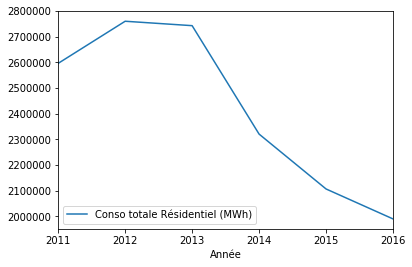

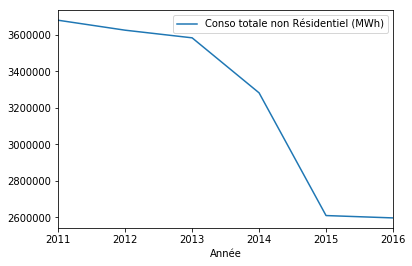

In [23]:
Residential_Record(data_frame_energy, 62)
Non_Residential_Record(data_frame_energy, 62)

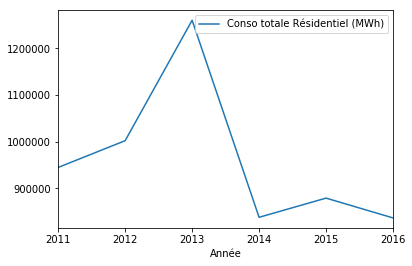

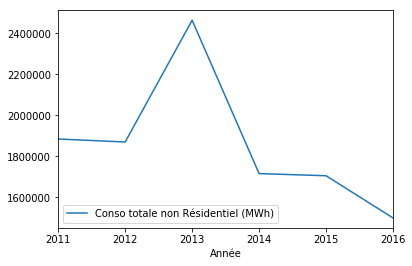

In [24]:
Residential_Record(data_frame_energy, 51)
Non_Residential_Record(data_frame_energy, 51)

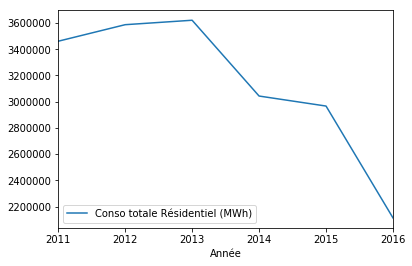

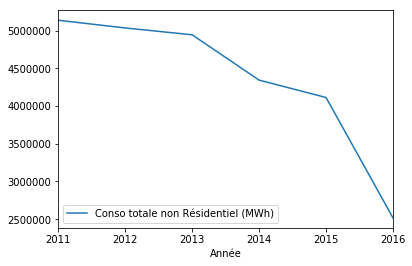

In [25]:
Residential_Record(data_frame_energy, 59)
Non_Residential_Record(data_frame_energy, 59)